In [1]:
%matplotlib notebook
#!pip install GEOS

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
#from mpl_toolkits.basemap import Basemap

In [3]:
DATA_FILE = 'NYCTaxiTrips_Yr2015.csv'
uber_data_0 = pd.read_csv(DATA_FILE)
uber_data_0.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_longitude,dropoff_latitude,dropoff_zip,dropoff_borough,dropoff_neighborhood,payment_type,fare_amount,tip_amount,total_amount
0,2,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.78,-73.999619,40.743599,10011,Manhattan,Chelsea and Clinton,-73.992203,40.764019,10036,Manhattan,Chelsea and Clinton,2,9.0,0.00,9.80
1,1,2015-01-13 09:18:29,2015-01-13 09:23:40,1,2.10,-73.981956,40.778290,10023,Manhattan,Upper West Side,-73.962173,40.805355,10024,Manhattan,Upper West Side,1,7.5,2.45,10.75
2,2,2015-01-16 07:15:44,2015-01-16 07:26:42,1,2.33,-73.991188,40.742226,10010,Manhattan,Gramercy Park and Murray Hill,-73.981613,40.768452,10019,Manhattan,Chelsea and Clinton,1,10.0,1.00,11.80
3,1,2015-01-23 11:56:05,2015-01-23 12:13:20,1,2.10,-73.959297,40.763336,10065,Manhattan,Upper East Side,-73.979996,40.781071,10023,Manhattan,Upper West Side,2,12.5,0.00,13.30
4,1,2015-01-24 10:11:48,2015-01-24 10:18:32,2,0.90,-73.971832,40.764751,10065,Manhattan,Upper East Side,-73.984047,40.764519,10019,Manhattan,Chelsea and Clinton,2,6.5,0.00,7.30


In [4]:
uber_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 19 columns):
VendorID                1200000 non-null int64
pickup_datetime         1200000 non-null object
dropoff_datetime        1200000 non-null object
passenger_count         1200000 non-null int64
trip_distance           1200000 non-null float64
pickup_longitude        1200000 non-null float64
pickup_latitude         1200000 non-null float64
pickup_zip              1200000 non-null int64
pickup_borough          1200000 non-null object
pickup_neighborhood     1200000 non-null object
dropoff_longitude       1200000 non-null float64
dropoff_latitude        1200000 non-null float64
dropoff_zip             1200000 non-null int64
dropoff_borough         1200000 non-null object
dropoff_neighborhood    1200000 non-null object
payment_type            1200000 non-null int64
fare_amount             1200000 non-null float64
tip_amount              1200000 non-null float64
total_amount         

In [5]:
uber_data = uber_data_0
uber_data['pickup_datetime'] = pd.to_datetime(uber_data['pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['pickup_datetime'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['pickup_datetime'].dt.weekday_name
uber_data['MonthDayNum'] = uber_data['pickup_datetime'].dt.day
uber_data['HourOfDay'] = uber_data['pickup_datetime'].dt.hour
uber_data['Month'] = uber_data['pickup_datetime'].dt.month

In [6]:
uber_data.head(20)

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,pickup_zip,pickup_borough,pickup_neighborhood,...,dropoff_neighborhood,payment_type,fare_amount,tip_amount,total_amount,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,Month
0,2,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.78,-73.999619,40.743599,10011,Manhattan,Chelsea and Clinton,...,Chelsea and Clinton,2,9.0,0.00,9.80,1,Tuesday,6,11,1
1,1,2015-01-13 09:18:29,2015-01-13 09:23:40,1,2.10,-73.981956,40.778290,10023,Manhattan,Upper West Side,...,Upper West Side,1,7.5,2.45,10.75,1,Tuesday,13,9,1
2,2,2015-01-16 07:15:44,2015-01-16 07:26:42,1,2.33,-73.991188,40.742226,10010,Manhattan,Gramercy Park and Murray Hill,...,Chelsea and Clinton,1,10.0,1.00,11.80,4,Friday,16,7,1
3,1,2015-01-23 11:56:05,2015-01-23 12:13:20,1,2.10,-73.959297,40.763336,10065,Manhattan,Upper East Side,...,Upper West Side,2,12.5,0.00,13.30,4,Friday,23,11,1
4,1,2015-01-24 10:11:48,2015-01-24 10:18:32,2,0.90,-73.971832,40.764751,10065,Manhattan,Upper East Side,...,Chelsea and Clinton,2,6.5,0.00,7.30,5,Saturday,24,10,1
5,1,2015-01-13 12:14:01,2015-01-13 12:37:14,1,4.00,-73.994438,40.750721,10001,Manhattan,Chelsea and Clinton,...,Lower Manhattan,2,18.0,0.00,18.80,1,Tuesday,13,12,1
6,2,2015-01-27 20:27:12,2015-01-27 20:41:40,3,3.13,-73.992767,40.756748,10018,Manhattan,Chelsea and Clinton,...,Greenwich Village and Soho,1,12.5,2.76,16.56,1,Tuesday,27,20,1
7,1,2015-01-10 21:37:54,2015-01-10 21:48:40,2,0.90,-73.991455,40.727707,10012,Manhattan,Greenwich Village and Soho,...,Greenwich Village and Soho,1,8.0,1.86,11.16,5,Saturday,10,21,1
8,2,2015-01-17 15:14:09,2015-01-17 15:29:21,1,1.56,-73.978531,40.729698,10009,Manhattan,Lower East Side,...,Greenwich Village and Soho,2,11.0,0.00,11.80,5,Saturday,17,15,1
9,2,2015-01-14 21:57:25,2015-01-14 22:09:12,1,1.89,-73.989326,40.743973,10010,Manhattan,Gramercy Park and Murray Hill,...,Chelsea and Clinton,1,9.5,2.00,12.80,2,Wednesday,14,21,1


<IPython.core.display.Javascript object>


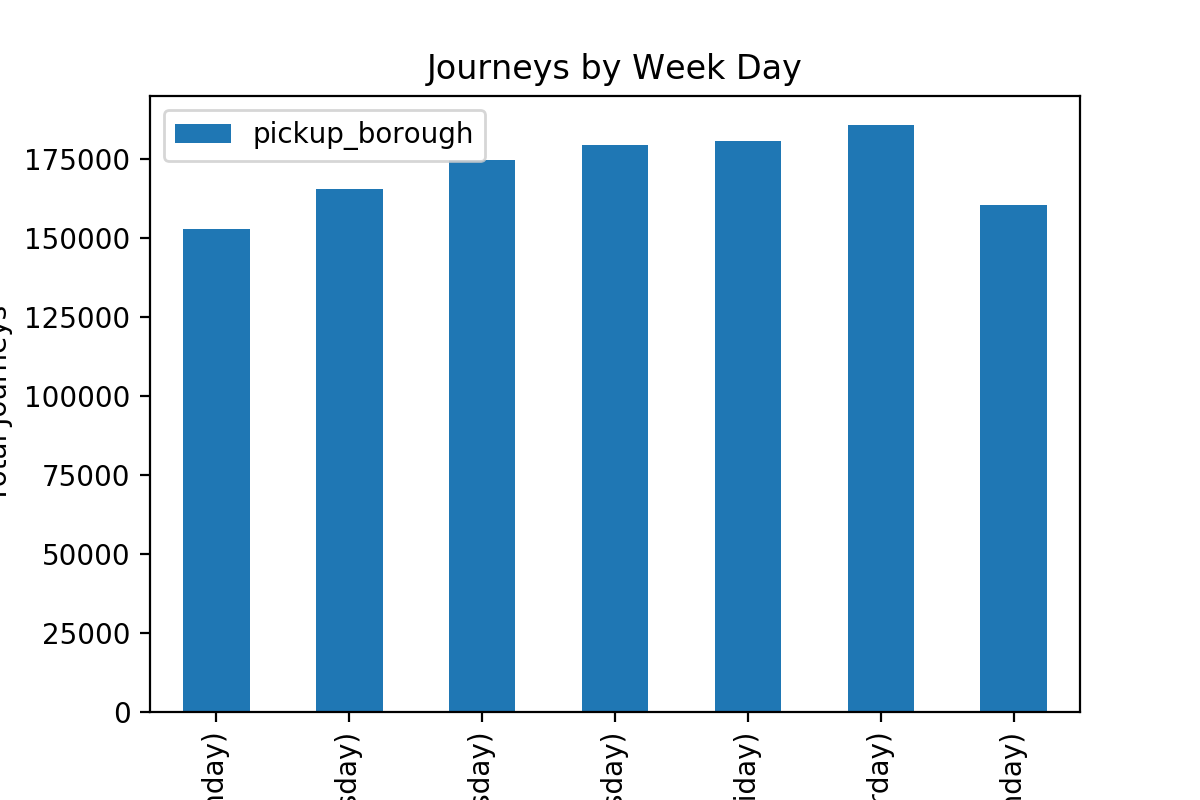

In [17]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='pickup_borough',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(6,4))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day')
plt.

In [8]:
df= uber_monthdays.reset_index()
df


,DayOfWeek,pickup_borough
0,Friday,180776
1,Monday,153059
2,Saturday,185746
3,Sunday,160603
4,Thursday,179529
5,Tuesday,165649
6,Wednesday,174638


<IPython.core.display.Javascript object>


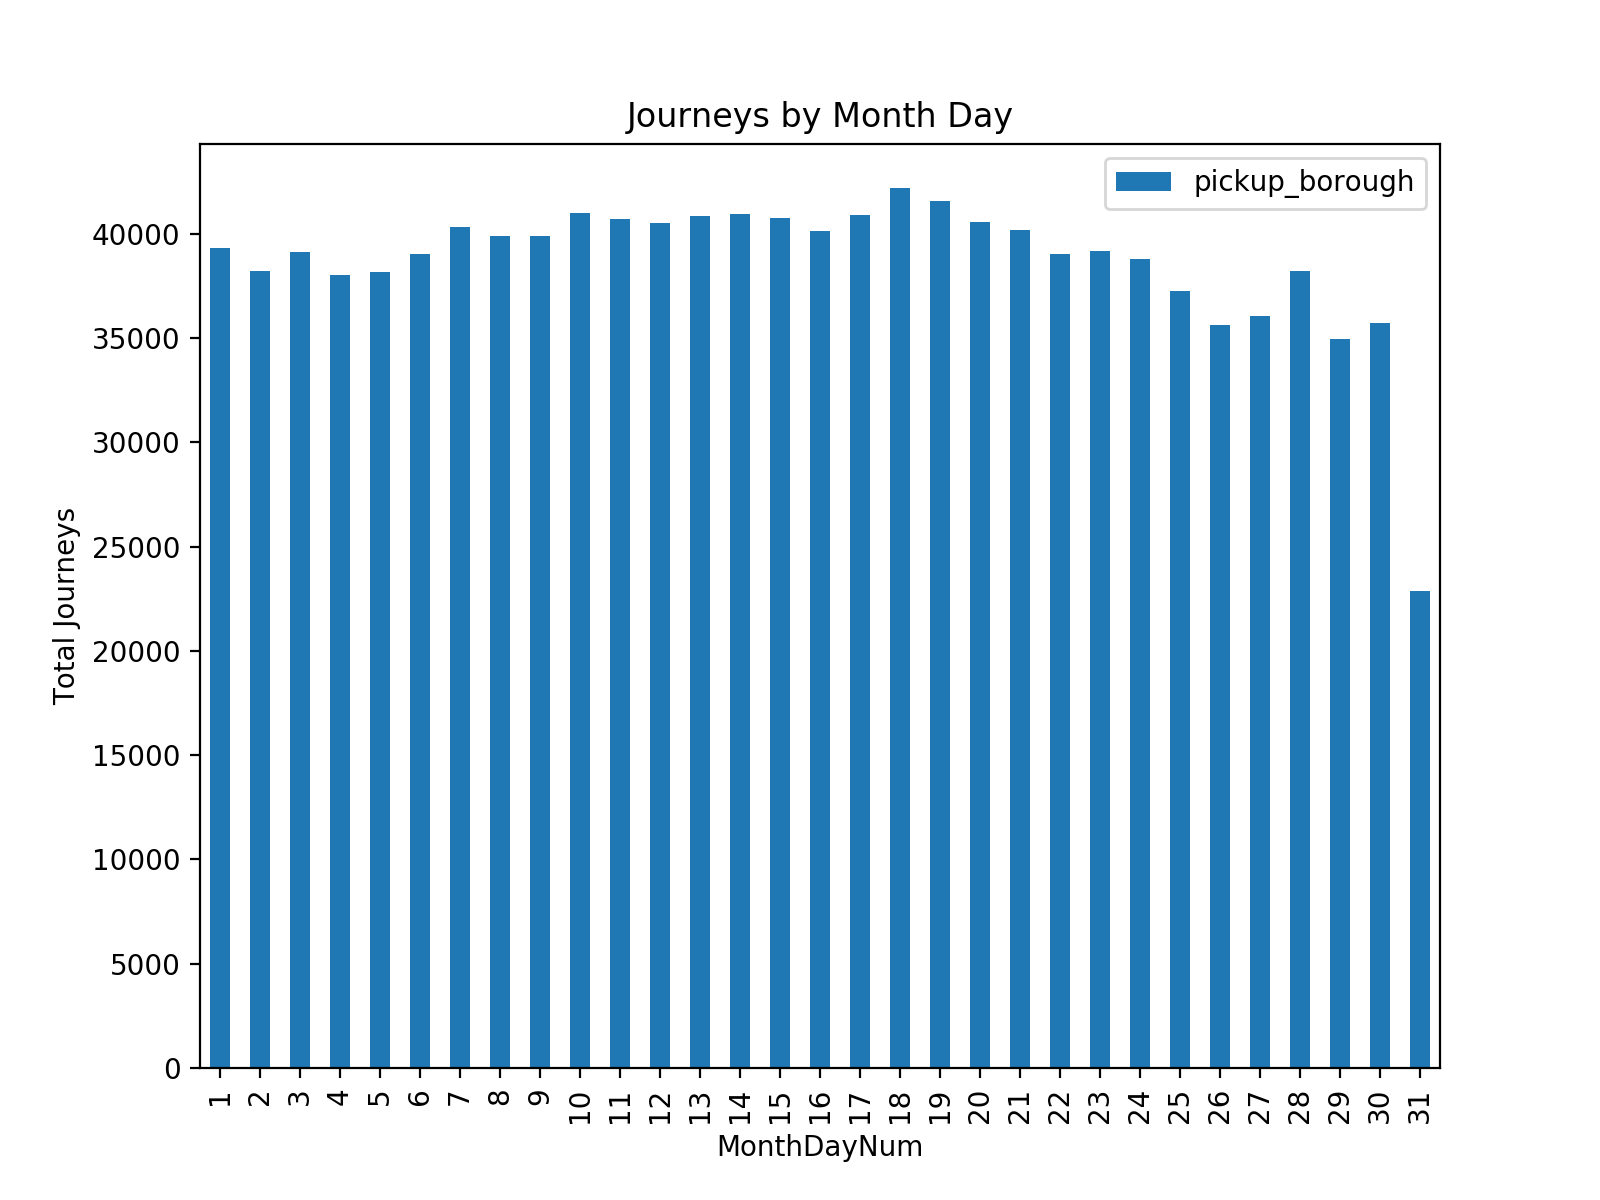

In [22]:
uber_monthdays = uber_data.pivot_table(index=['MonthDayNum'],
                                  values='pickup_borough',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day');

<IPython.core.display.Javascript object>


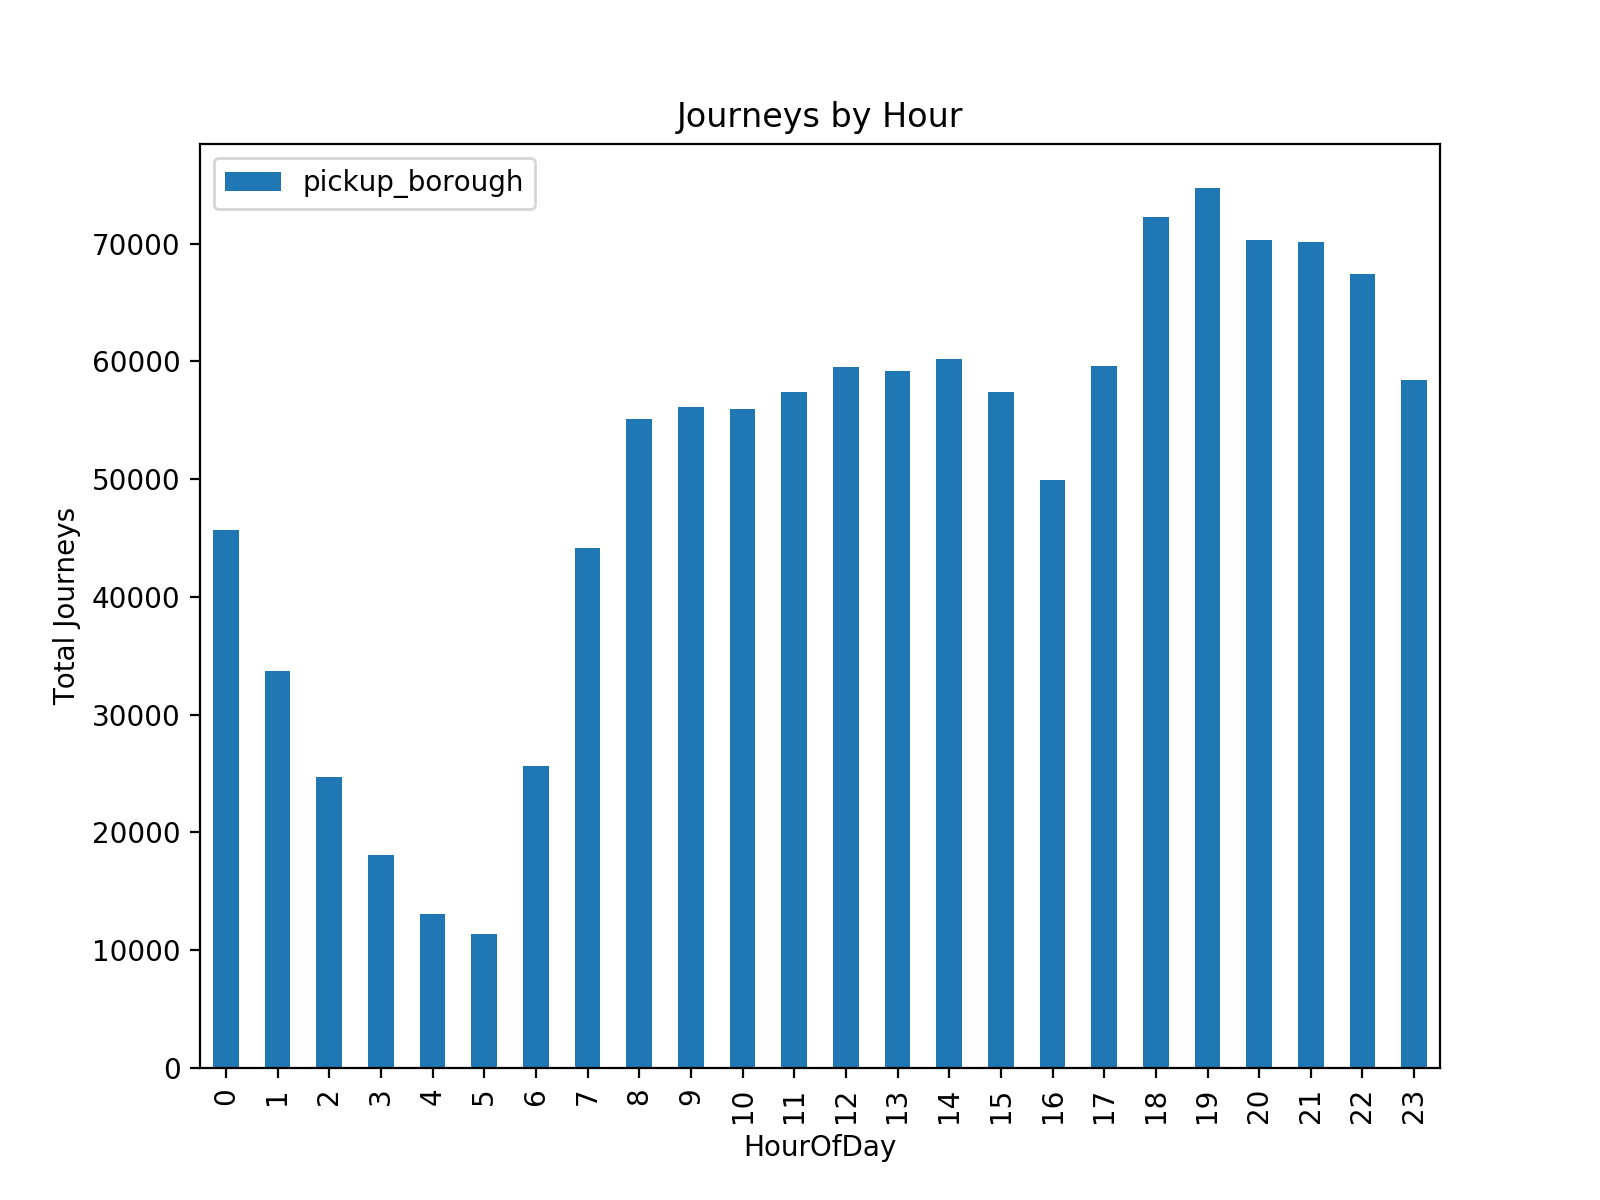

In [9]:
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='pickup_borough',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');

<IPython.core.display.Javascript object>


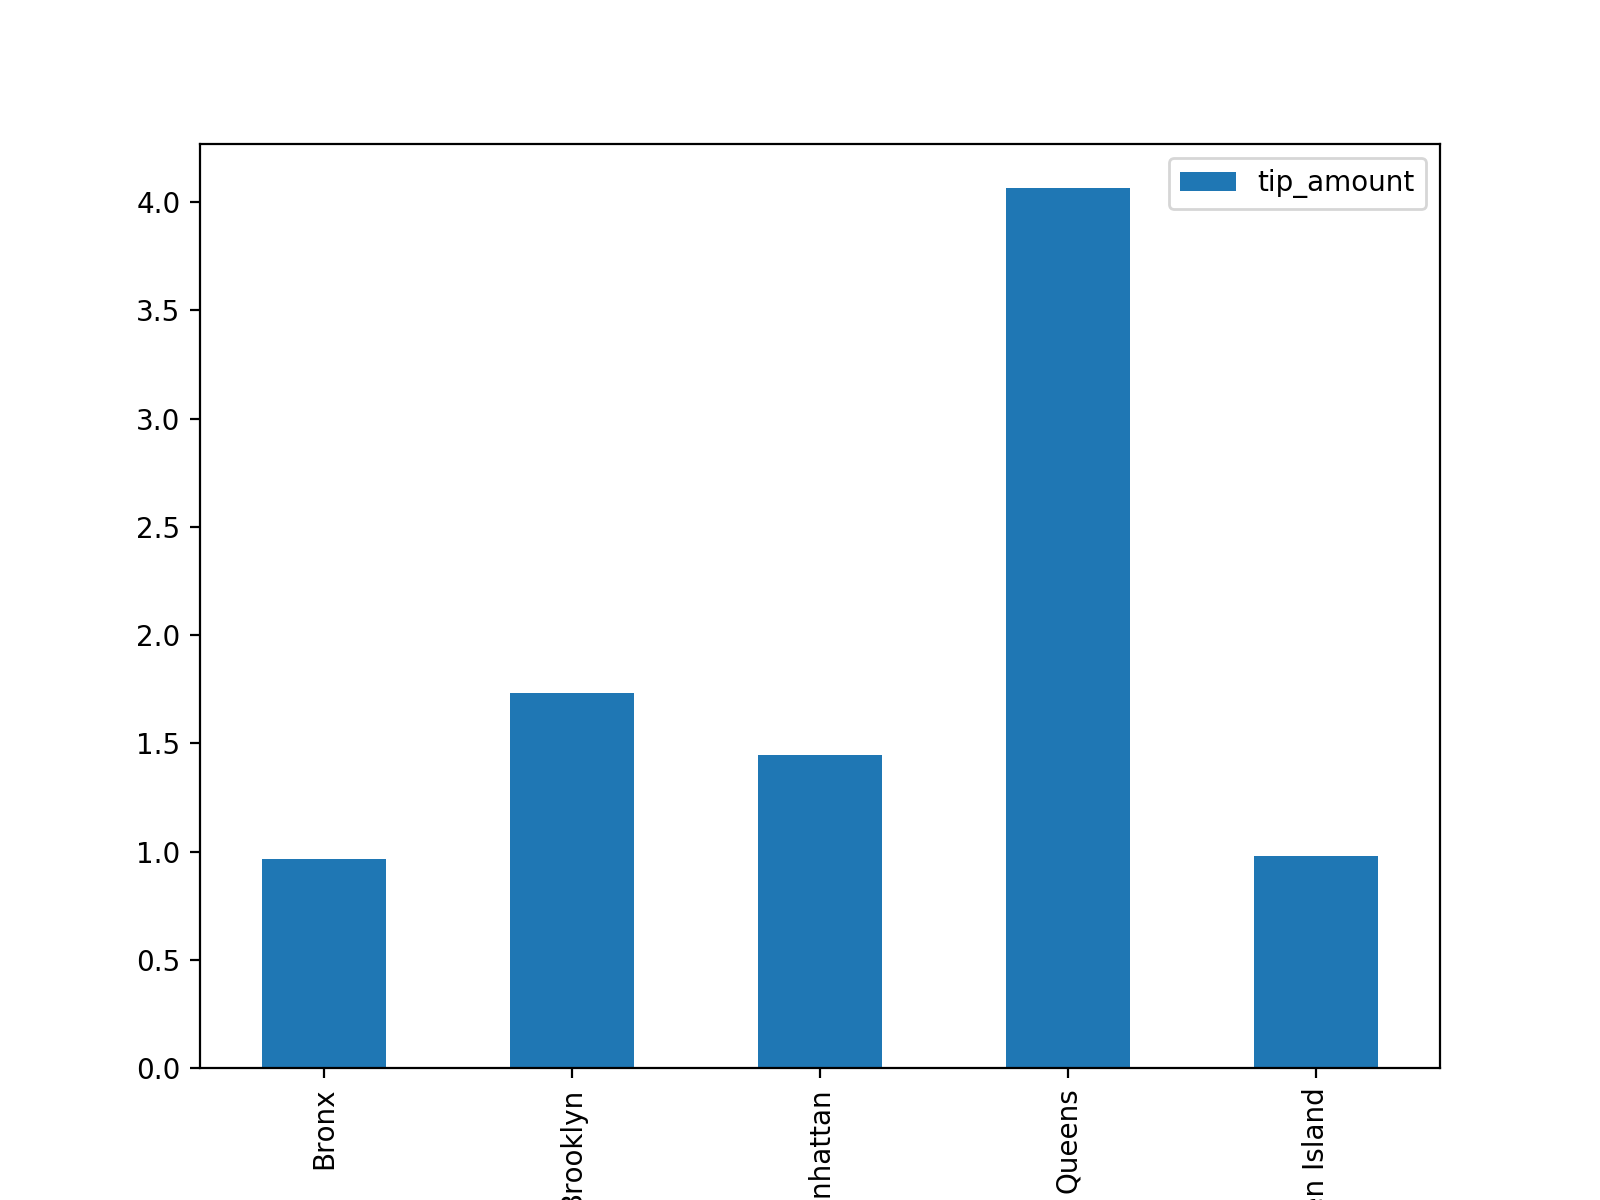

<IPython.core.display.Javascript object>


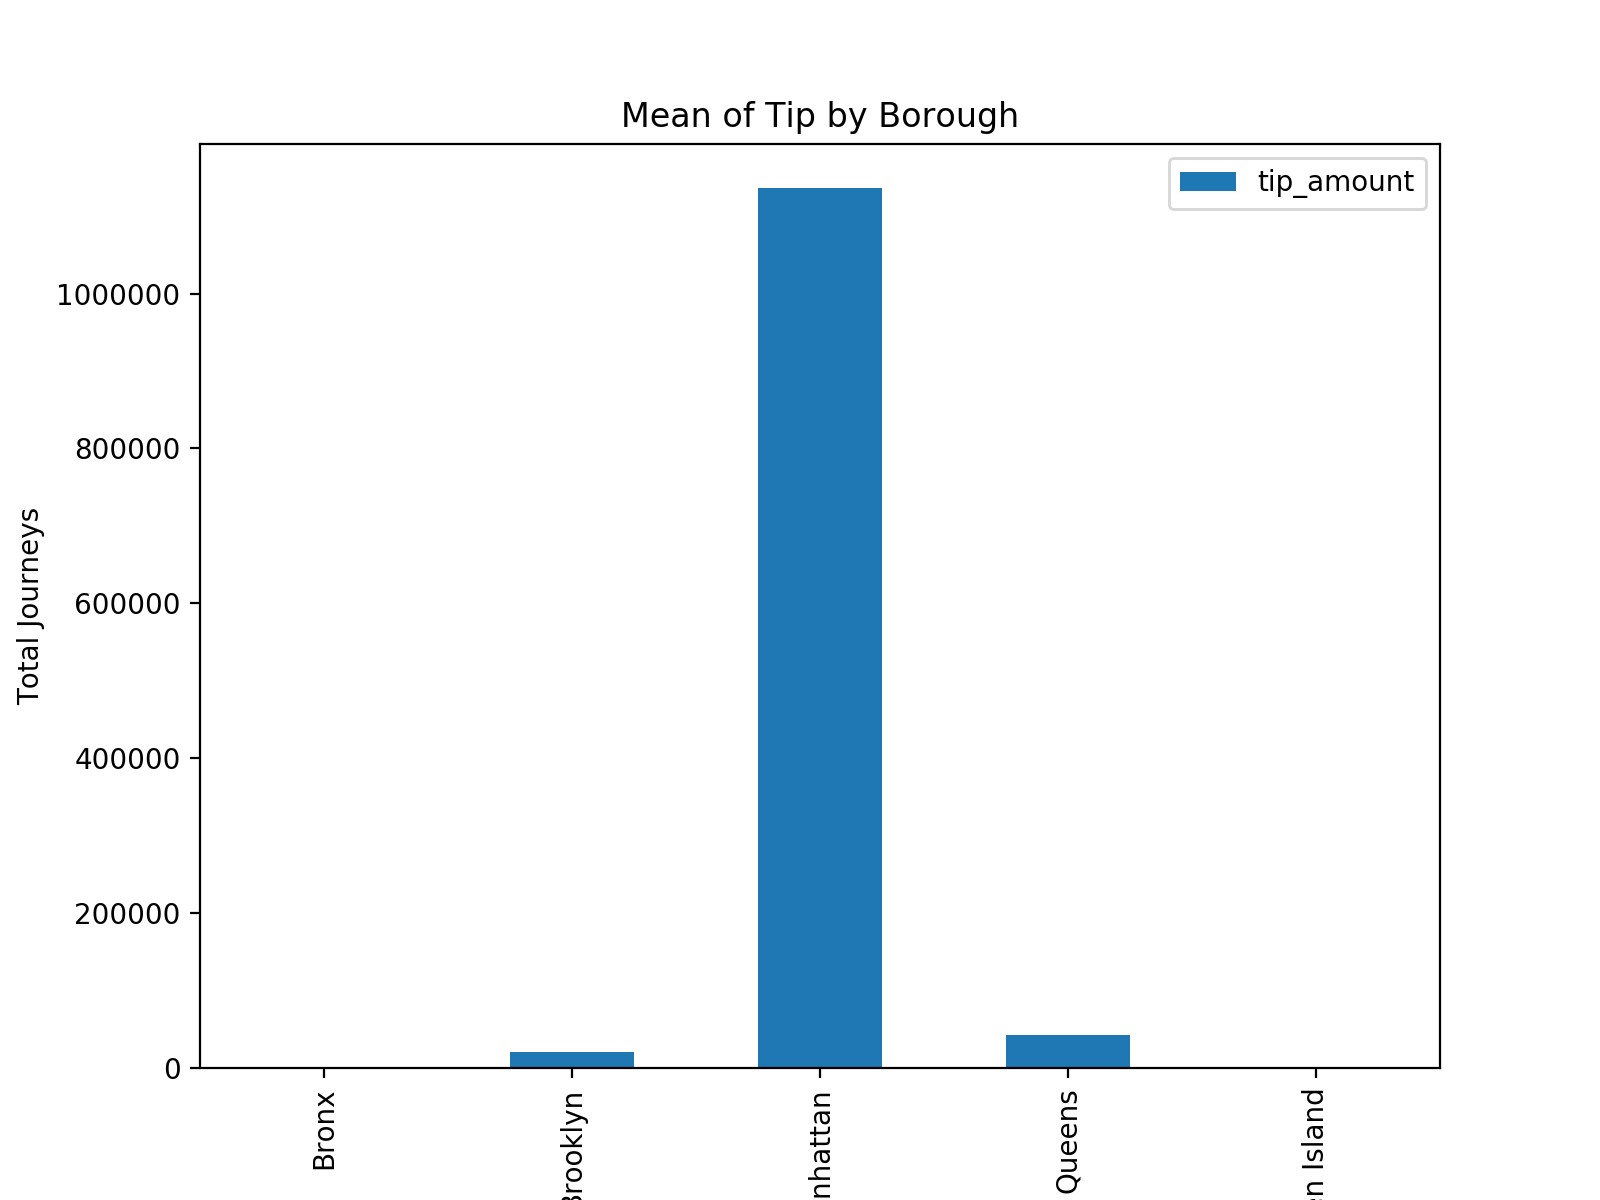

In [26]:
uber_hour = uber_data.pivot_table(index=['pickup_borough'],
                                  values='tip_amount',
                                  aggfunc='mean')
uber_hour_2 = uber_data.pivot_table(index=['pickup_borough'],
                                  values='tip_amount',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
uber_hour_2.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Mean of Tip by Borough');

<IPython.core.display.Javascript object>


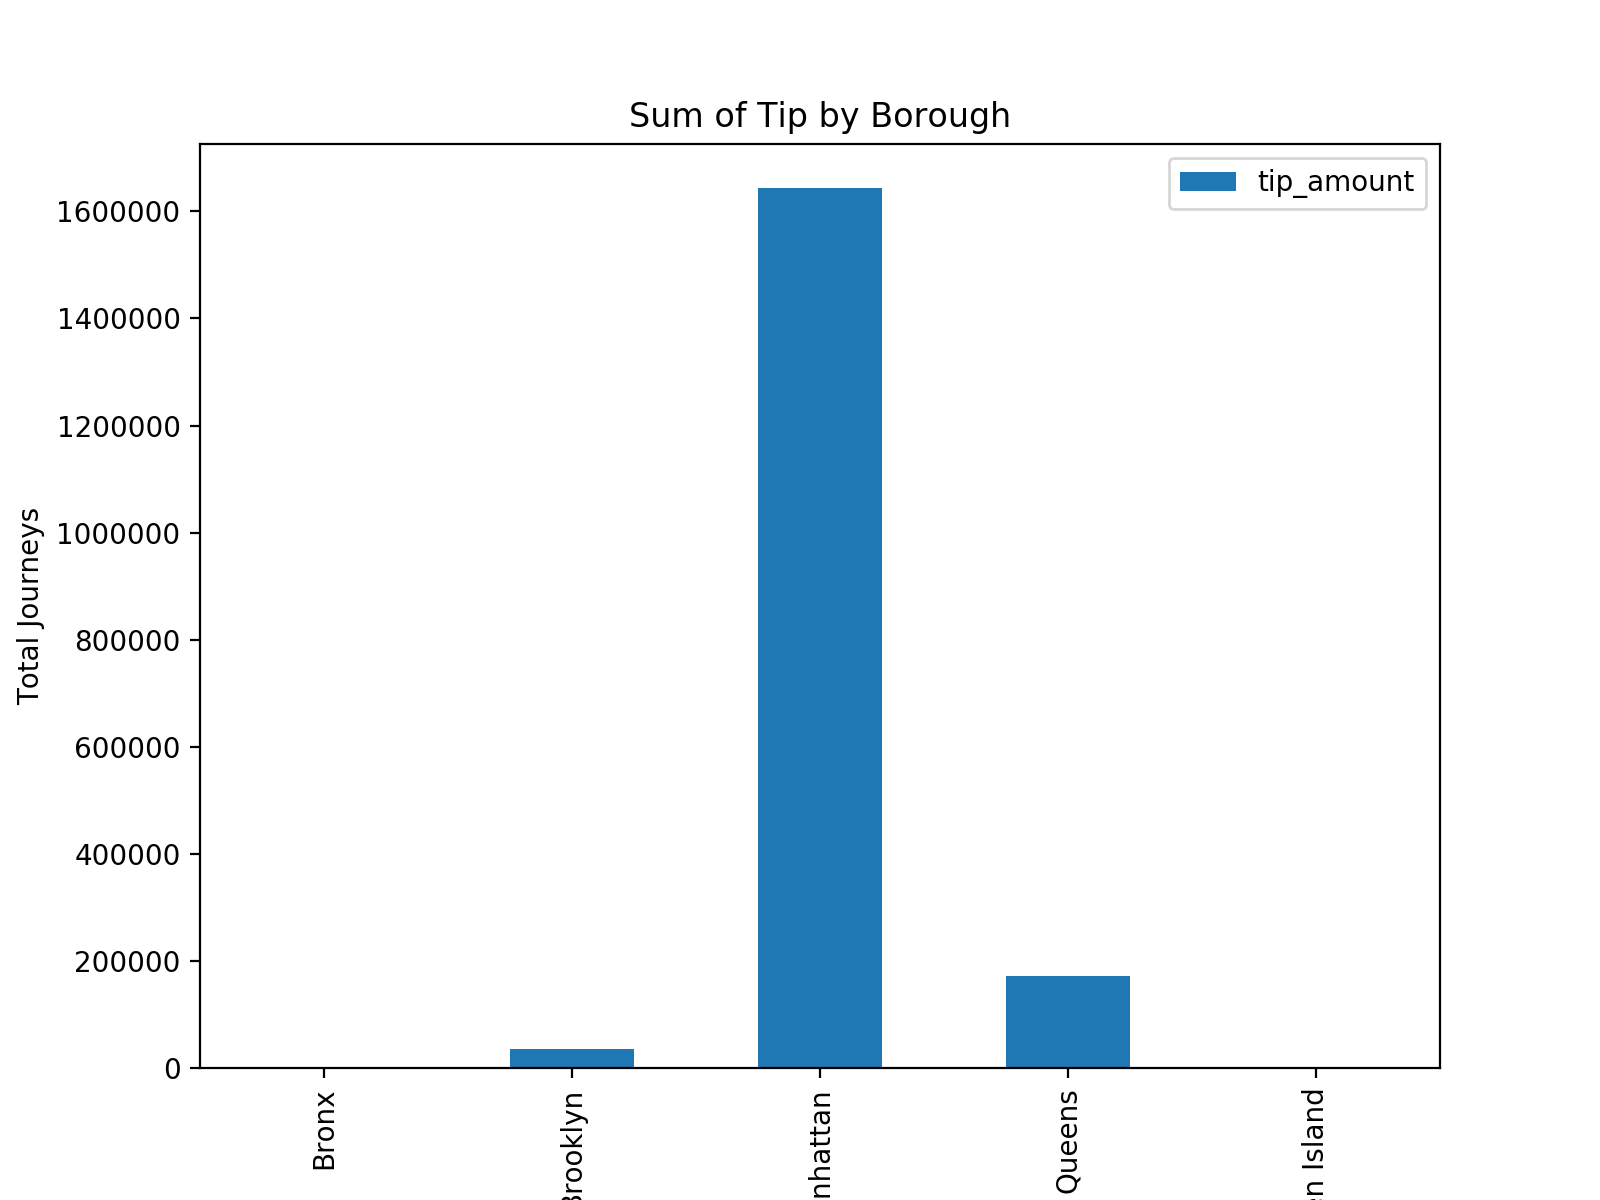

In [19]:
uber_hour = uber_data.pivot_table(index=['pickup_borough'],
                                  values='tip_amount',
                                  aggfunc='sum')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Sum of Tip by Borough');

<IPython.core.display.Javascript object>


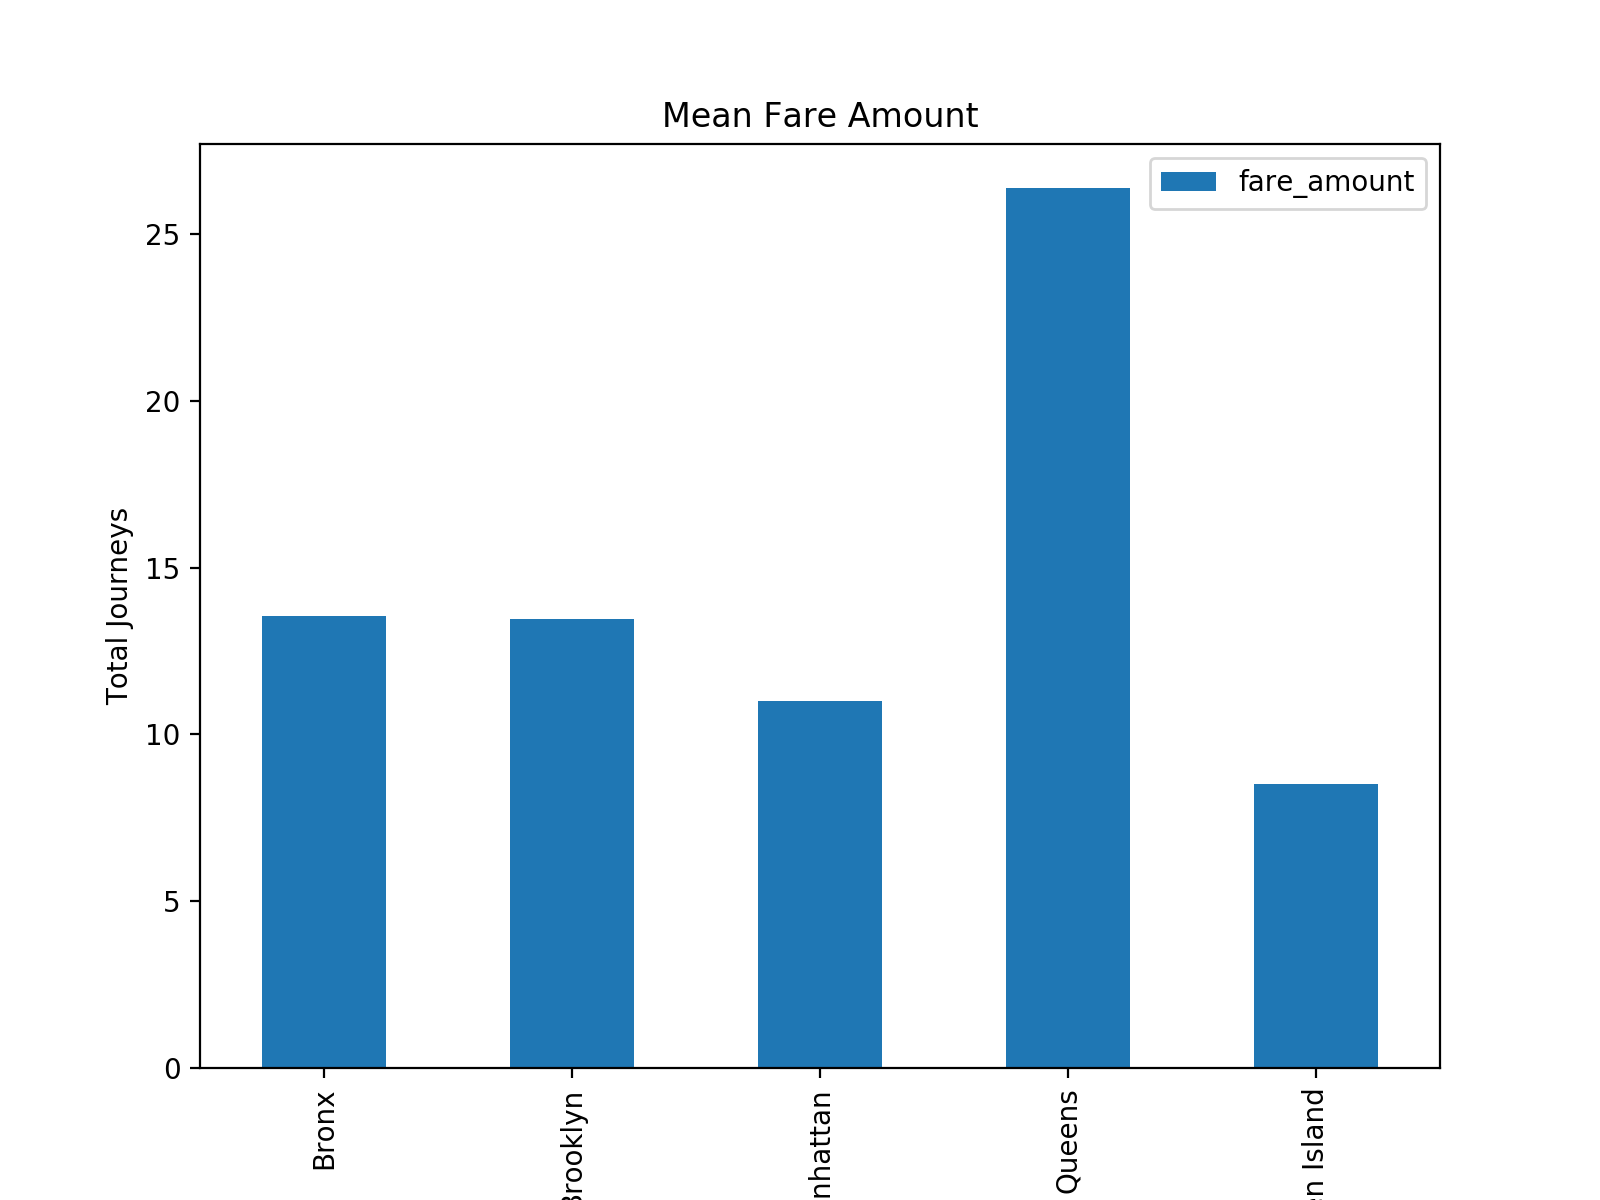

In [21]:
uber_hour = uber_data.pivot_table(index=['pickup_borough'],
                                  values='fare_amount',
                                  aggfunc='mean')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Mean Fare Amount');

In [12]:
groupby1 = uber_data.groupby("pickup_neighborhood")
groupby2 = groupby1.mean().reset_index()
groupby3 = groupby2["pickup_neighborhood"]
df = pd.DataFrame(groupby3)
df.to_csv("Pickup_Neighbourhood.csv")

<IPython.core.display.Javascript object>


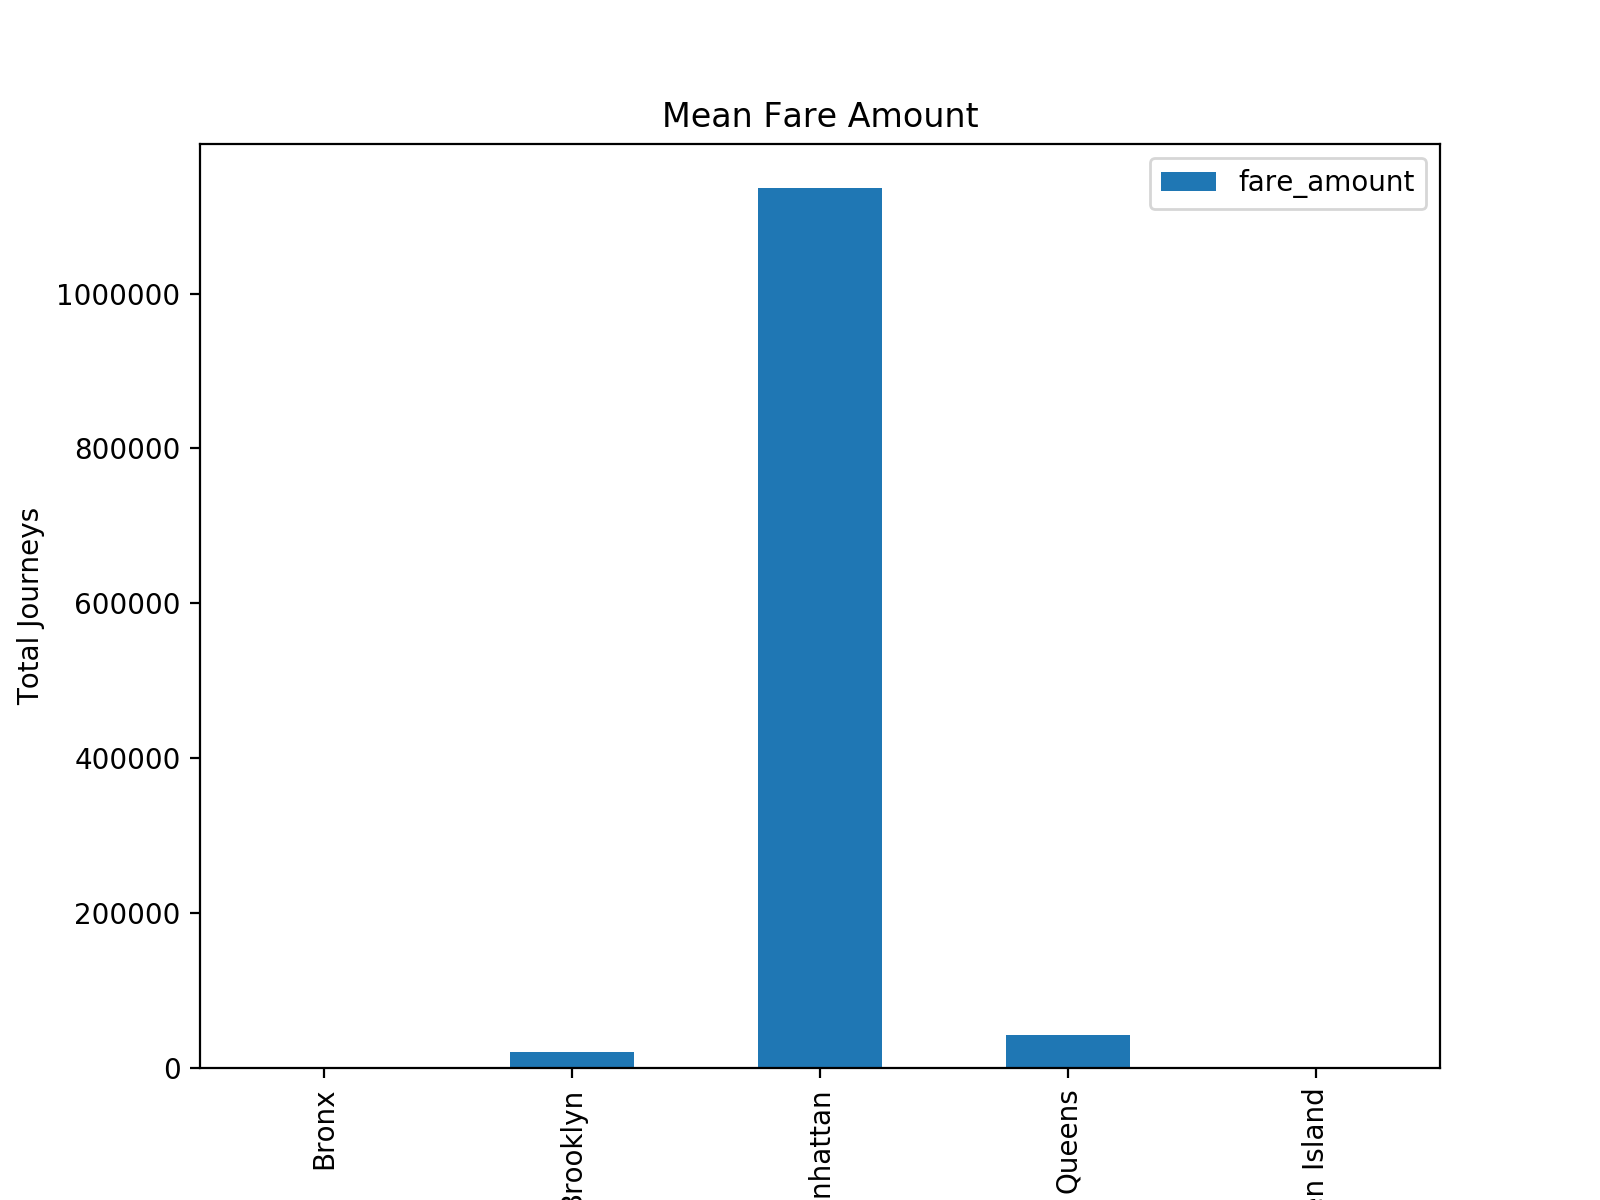

In [20]:
uber_hour = uber_data.pivot_table(index=['pickup_borough'],
                                  values='fare_amount',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Mean Fare Amount');